In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('delhiaqi.csv')
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [ ]:
data.shape

(561, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [ ]:
data.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

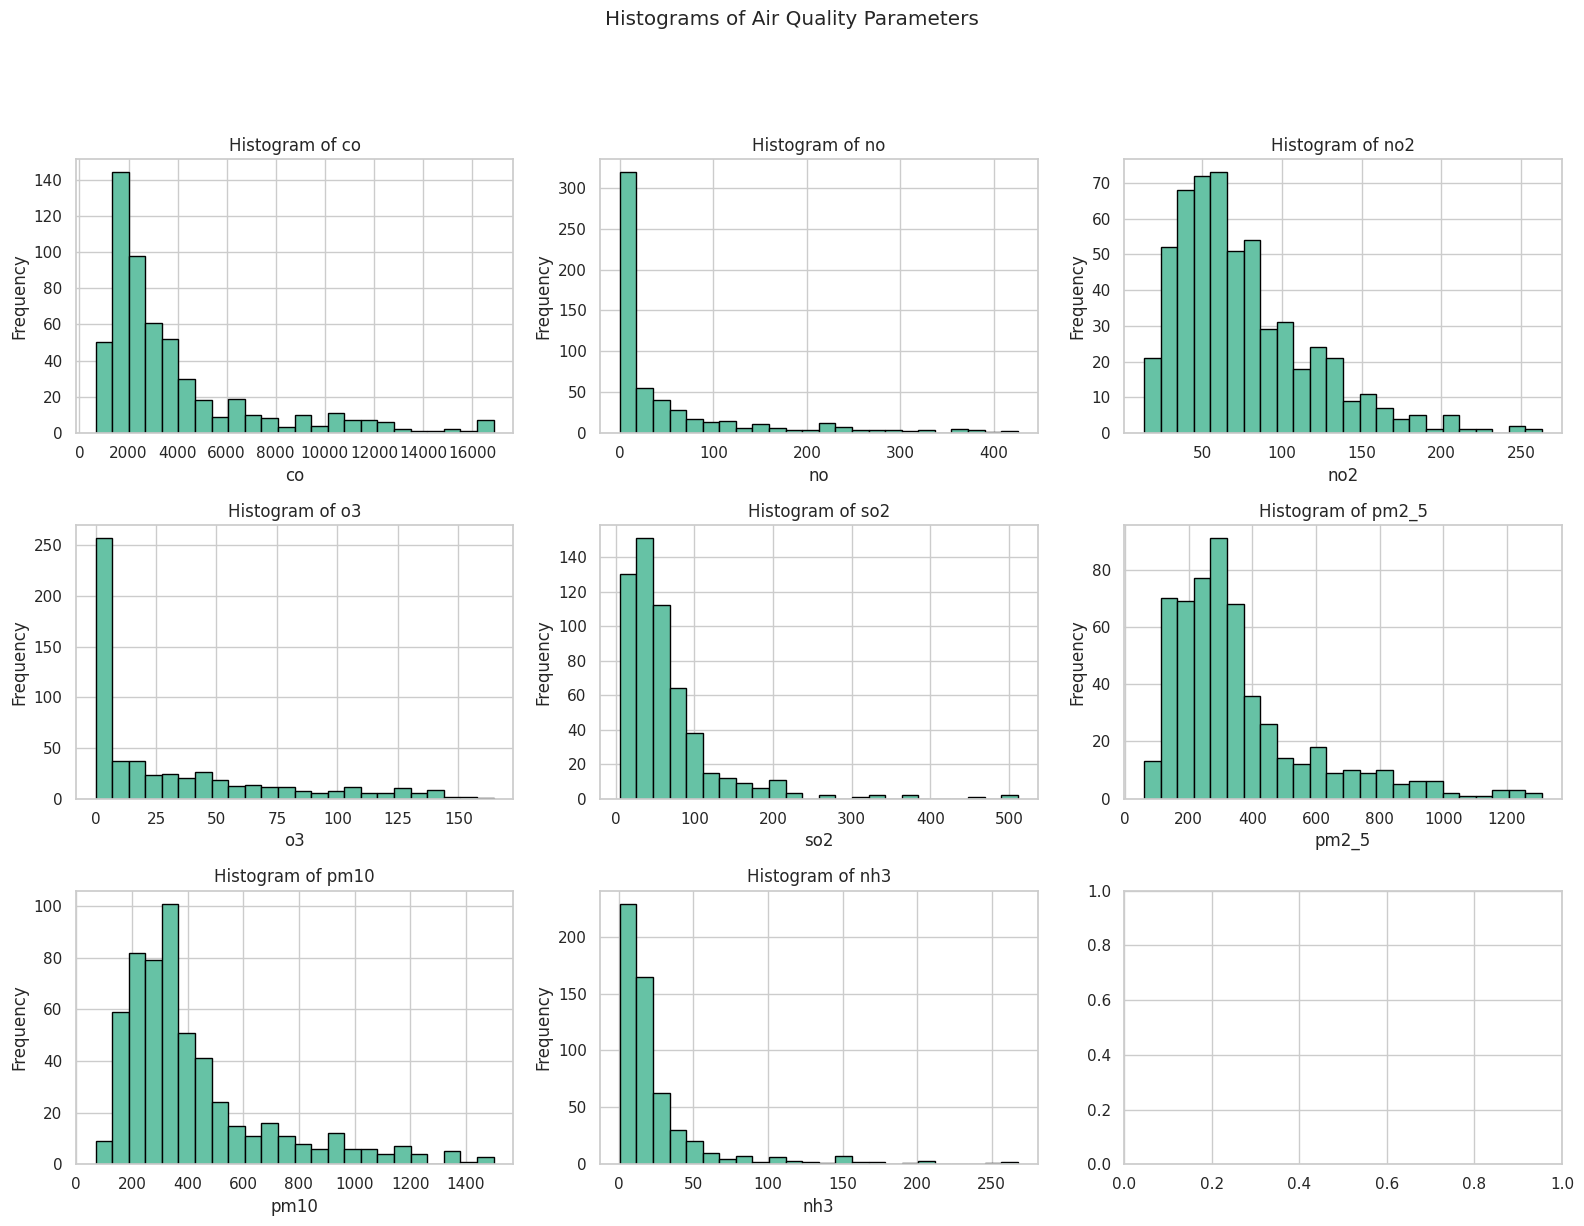

In [ ]:
air_quality_features = data.drop(columns=['date'])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(air_quality_features.columns):
    air_quality_features[col].hist(bins=24, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

plt.suptitle('Histograms of Air Quality Parameters', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.set_palette('Pastel1')
plt.show()

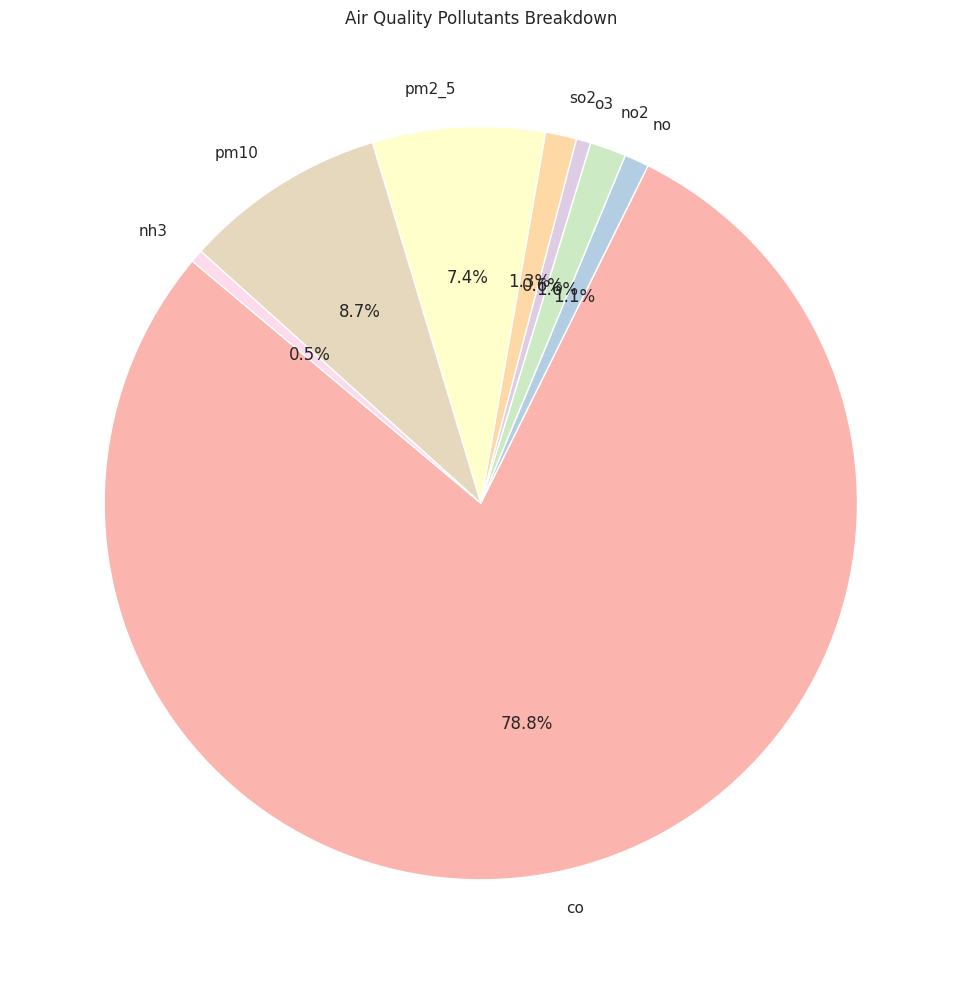

In [ ]:
pollutant_names = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
pollutant_sums = data[pollutant_names].sum(axis=0)
plt.figure(figsize=(12,10))
plt.pie(pollutant_sums, labels=pollutant_names, autopct='%1.1f%%', startangle=140)
plt.title('Air Quality Pollutants Breakdown')
plt.tight_layout()
plt.show()

**Observation:** Carbon Monoxide (CO) accounts for the largest portion of the pollution, contributing approximately 79%.

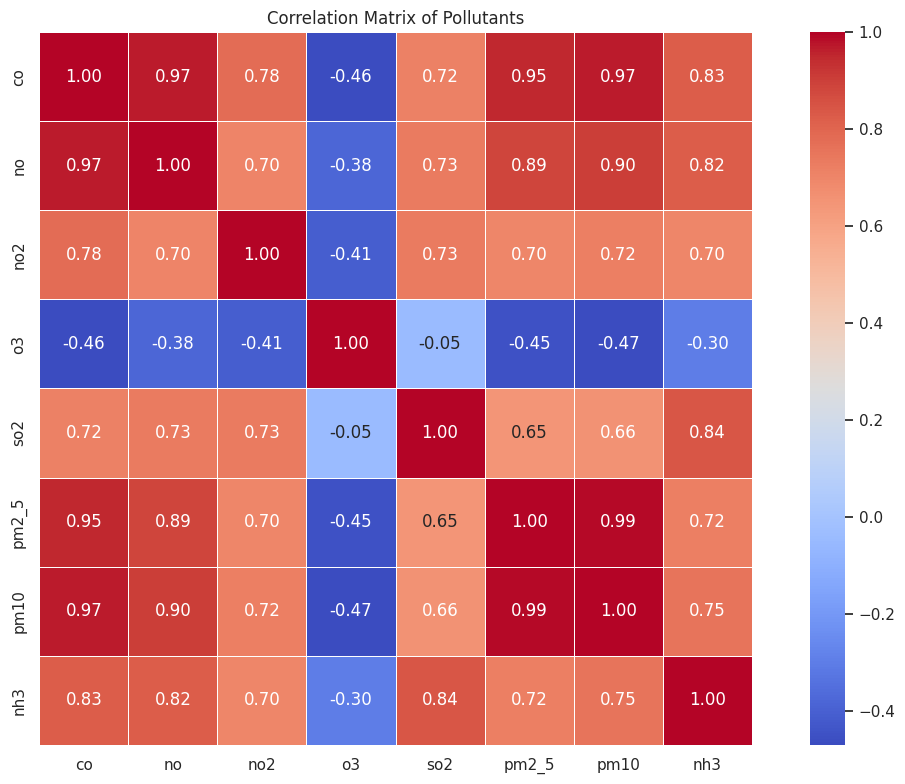

In [ ]:
correlation_matrix = data[pollutant_names].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True)

plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()

plt.show()

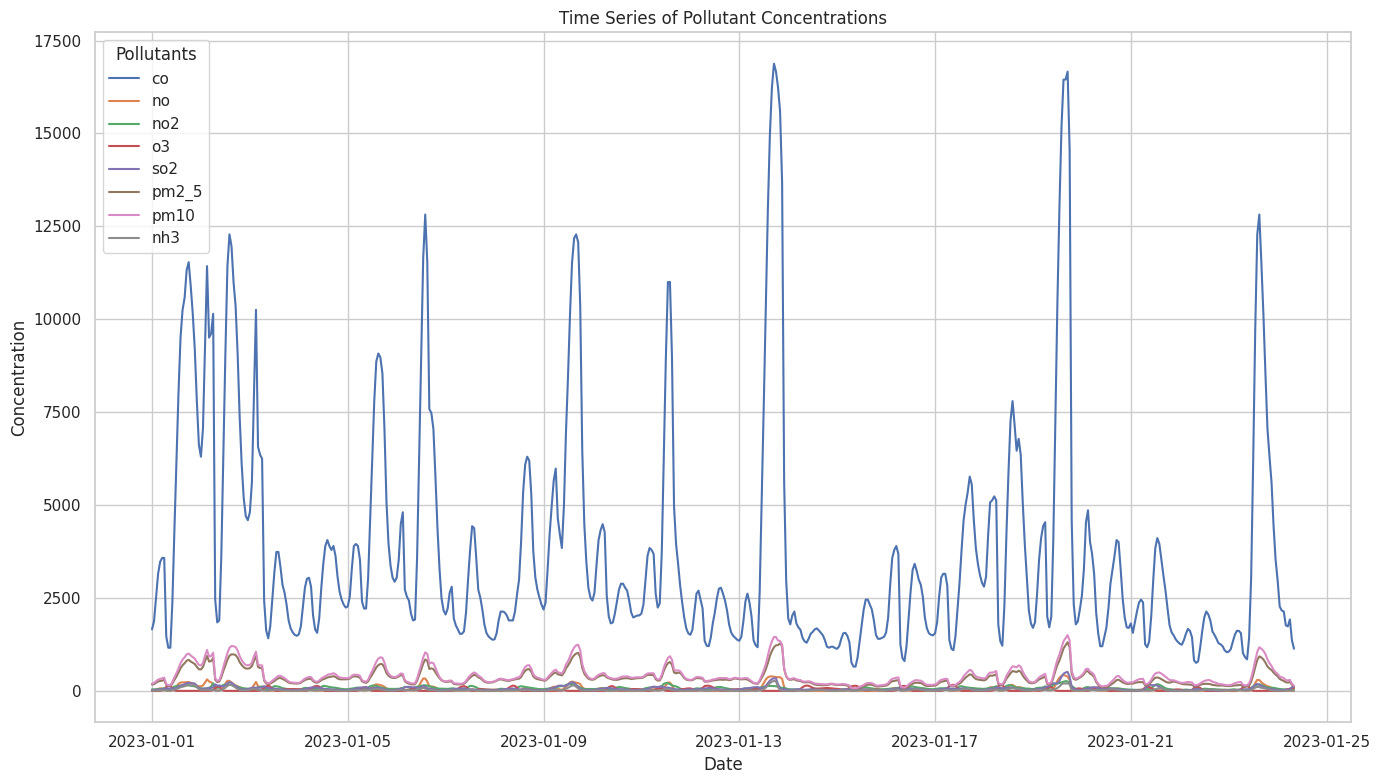

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

pollutant_names = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

for pollutant in pollutant_names:
    plt.plot(data.index, data[pollutant], label=pollutant)

plt.legend(title='Pollutants')
plt.title('Time Series of Pollutant Concentrations')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.tight_layout()
plt.show()







In [ ]:
def calculate_pm25_aqi(concentration):

    pm25_breakpoints = [
        (0, 12, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500)
    ]

    for (low_conc, high_conc, low_index, high_index) in pm25_breakpoints:
        if low_conc <= concentration <= high_conc:
            return low_index + (high_index - low_index) / (high_conc - low_conc) * (concentration - low_conc)

    return 500

In [ ]:
pm25_concentration = 55
pm25_aqi = calculate_pm25_aqi(pm25_concentration)
print(f"The AQI for PM2.5 concentration of {pm25_concentration} µg/m³ is {pm25_aqi:.2f}")

The AQI for PM2.5 concentration of 55 µg/m³ is 149.02


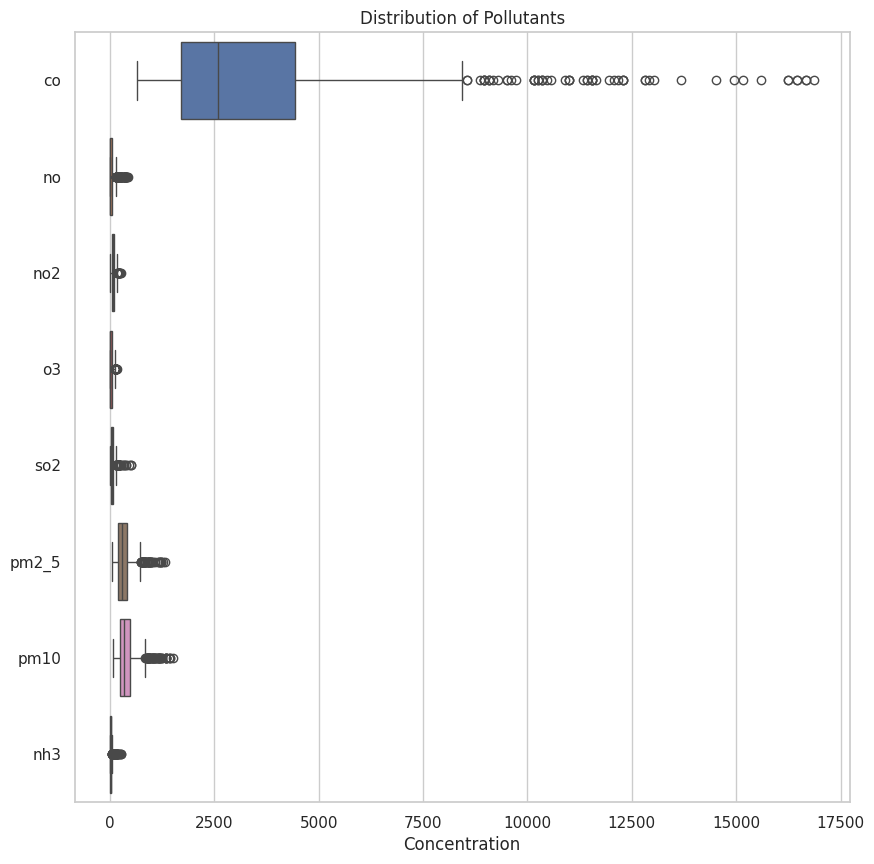

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, orient='h')
plt.title('Distribution of Pollutants')
plt.xlabel('Concentration')
plt.show()

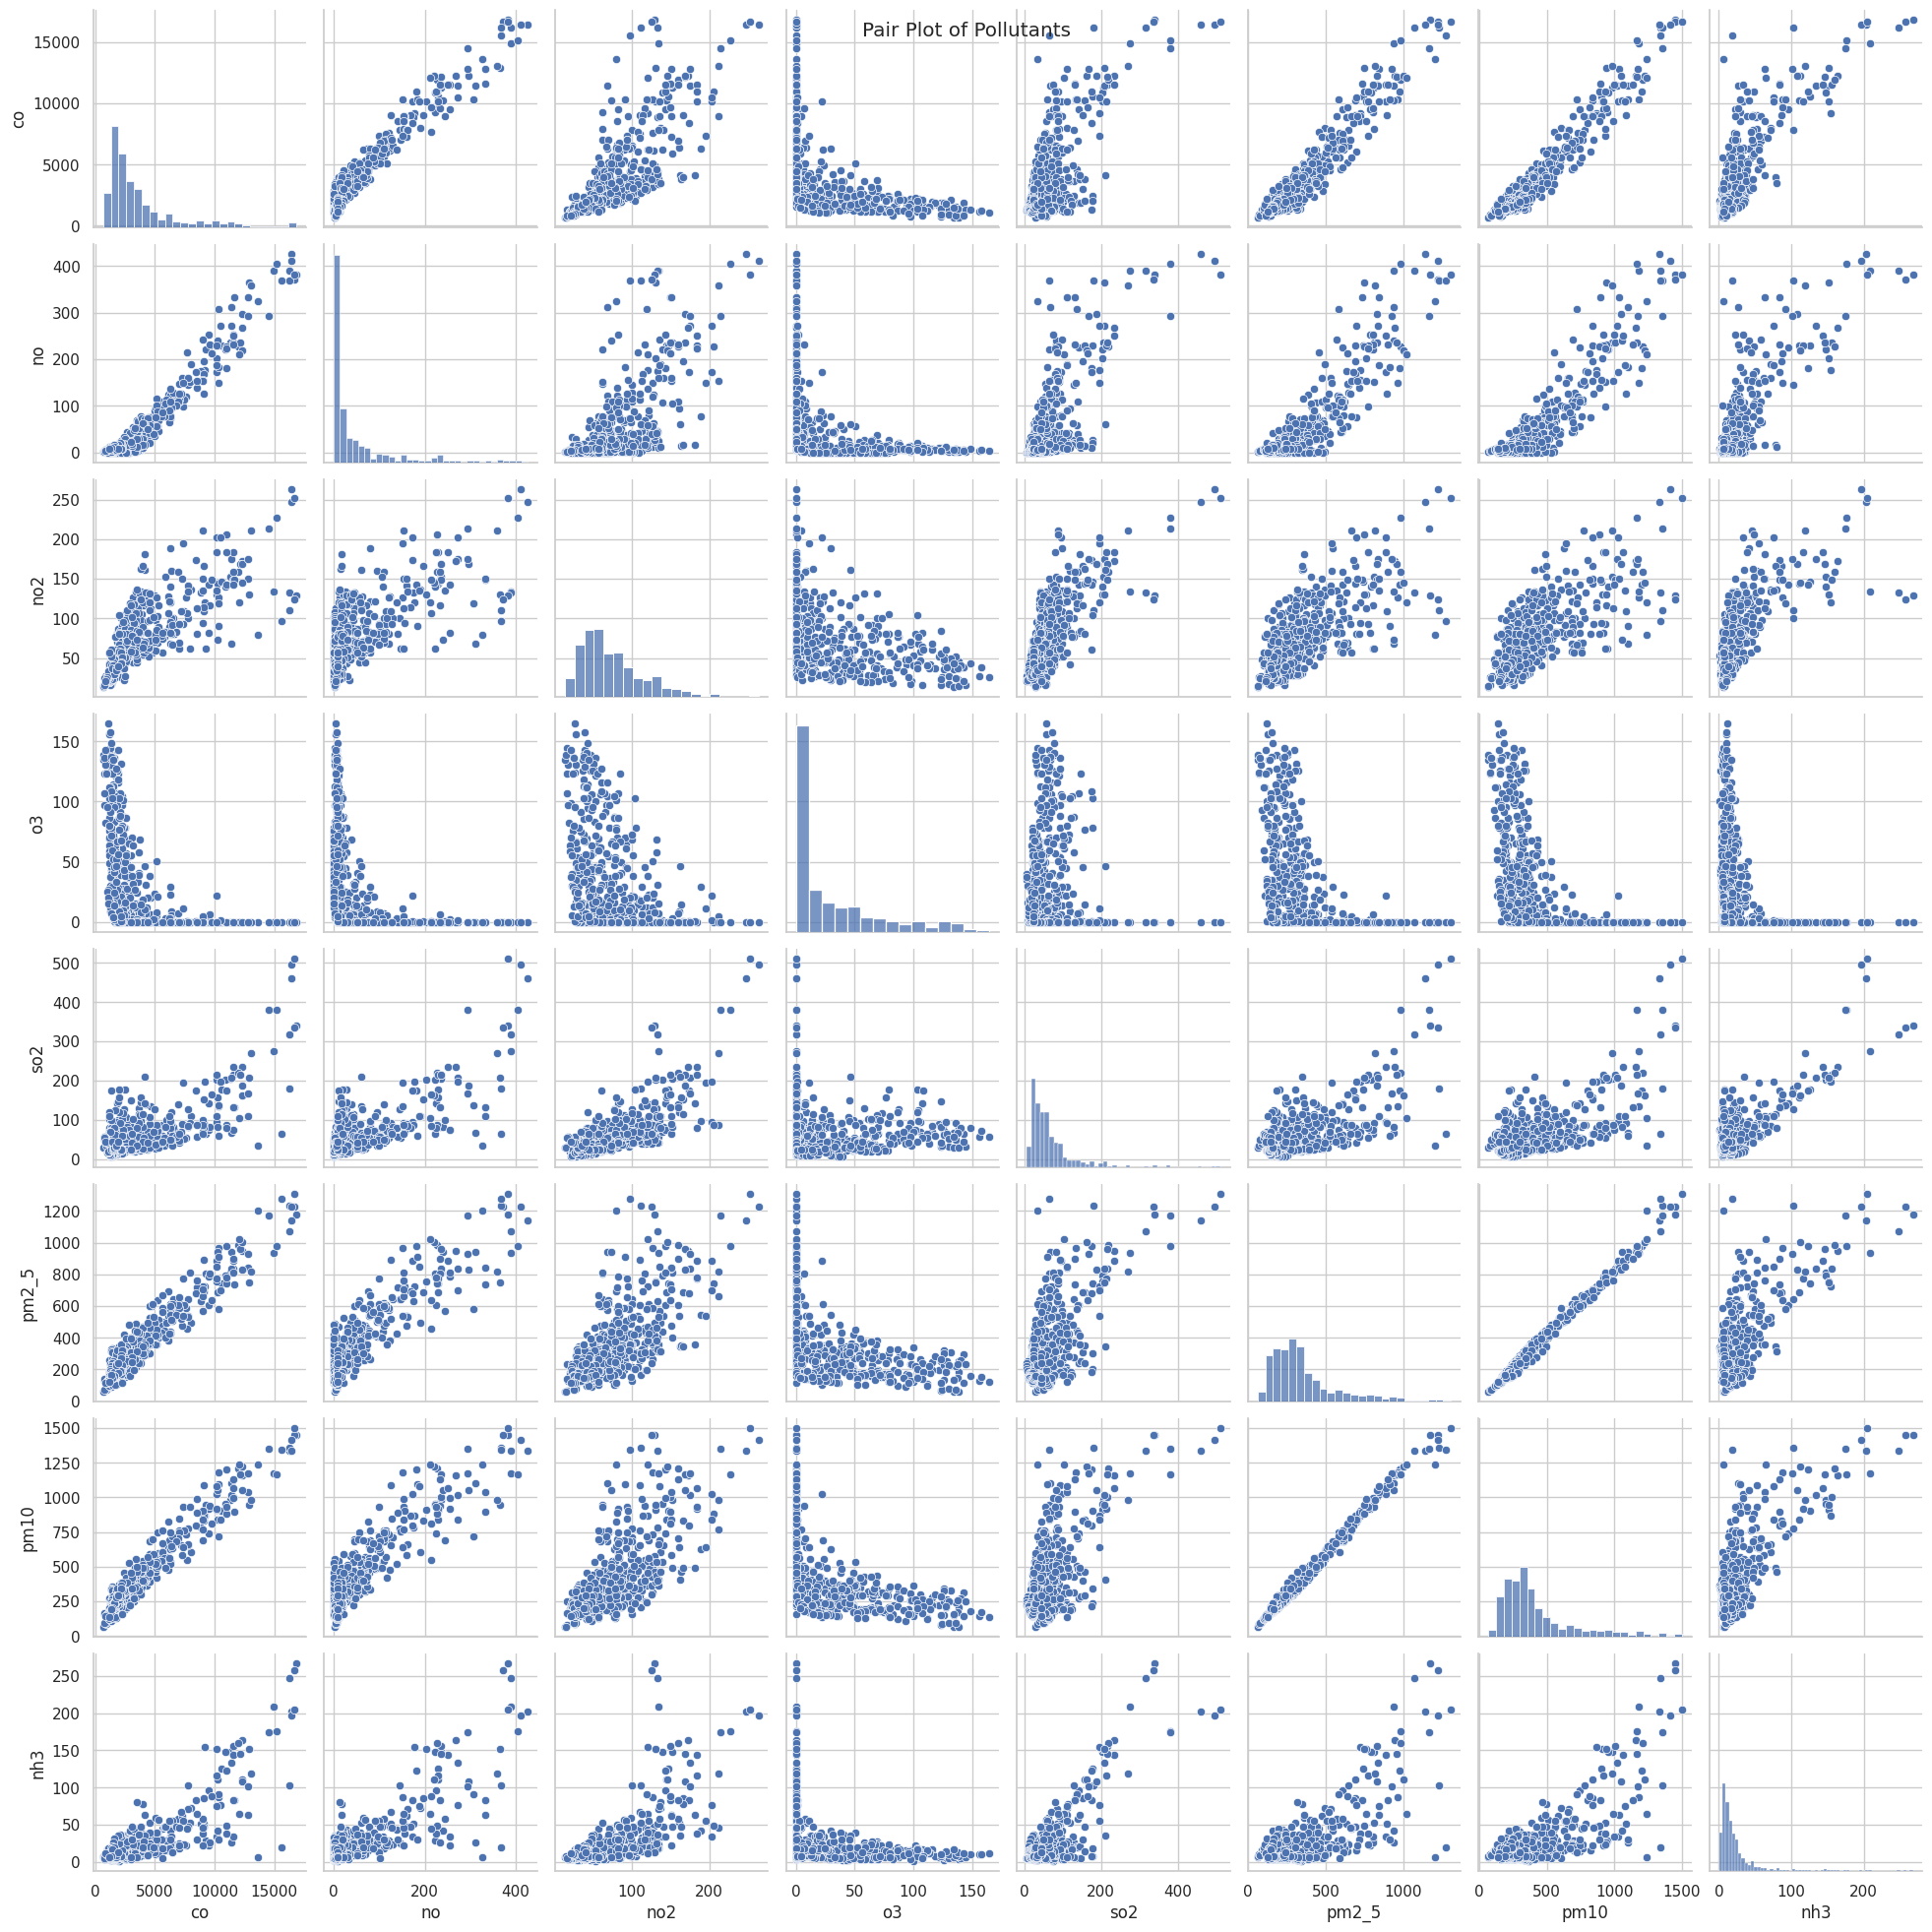

In [ ]:
sns.pairplot(data)
plt.suptitle('Pair Plot of Pollutants')
plt.show()

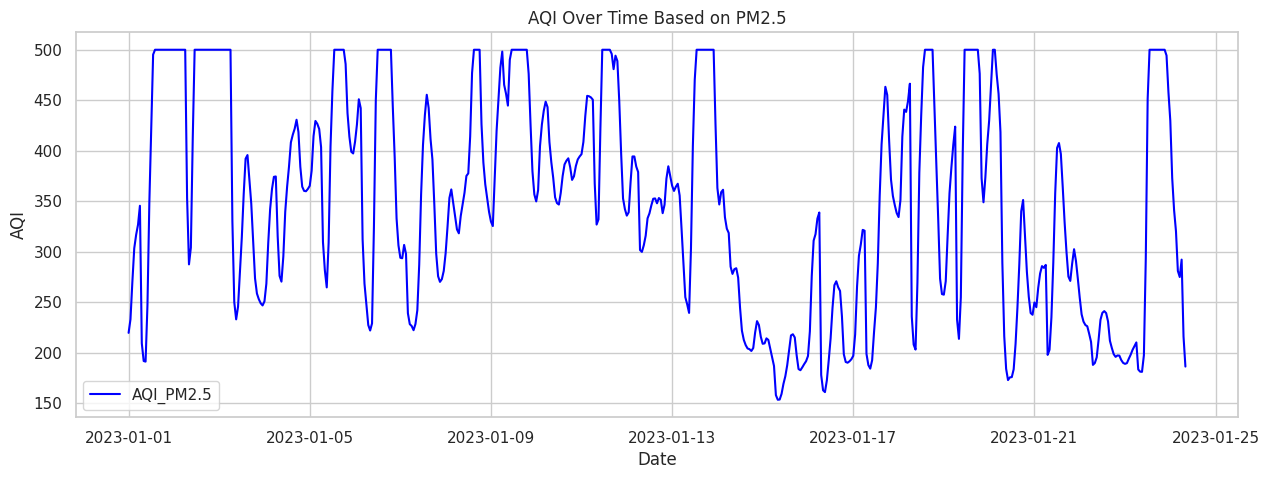

In [ ]:
# Calculate AQI_PM2.5
data['AQI_PM2.5'] = data['pm2_5'].apply(calculate_pm25_aqi)

# Plotting AQI over time based on PM2.5
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['AQI_PM2.5'], label='AQI_PM2.5', color='blue')
plt.title('AQI Over Time Based on PM2.5')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


The 'date' column is not found in the dataset.
                          co     no    no2    o3    so2   pm2_5    pm10  \
date                                                                      
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

                       nh3   AQI_PM2.5  
date                                    
2023-01-01 00:00:00   5.83  219.620721  
2023-01-01 01:00:00   7.66  233.048649  
2023-01-01 02:00:00  11.40  270.121622  
2023-01-01 03:00:00  13.55  303.378378  
2023-01-01 04:00:00  14.19  316.717117  


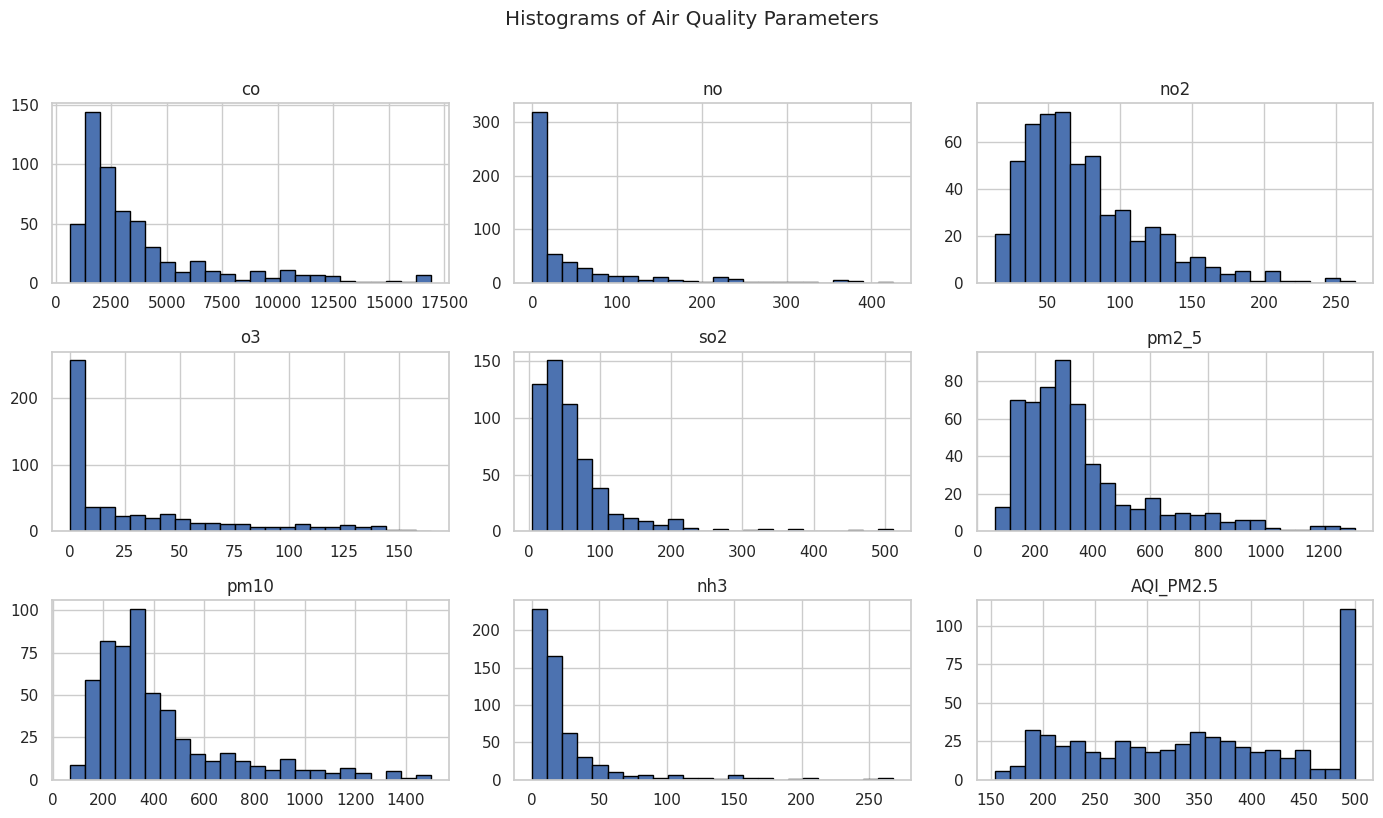

In [ ]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
else:
    print("The 'date' column is not found in the dataset.")

print(data.head())

if 'date' in data.columns:
    features = data.drop(columns=['date'])
else:
    features = data

features.hist(bins=24, figsize=(14,8), edgecolor='black')
plt.suptitle('Histograms of Air Quality Parameters', y=1.02)
plt.tight_layout()

sns.set_palette('Set2')
plt.show()

daily_data = data.resample('D').mean()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

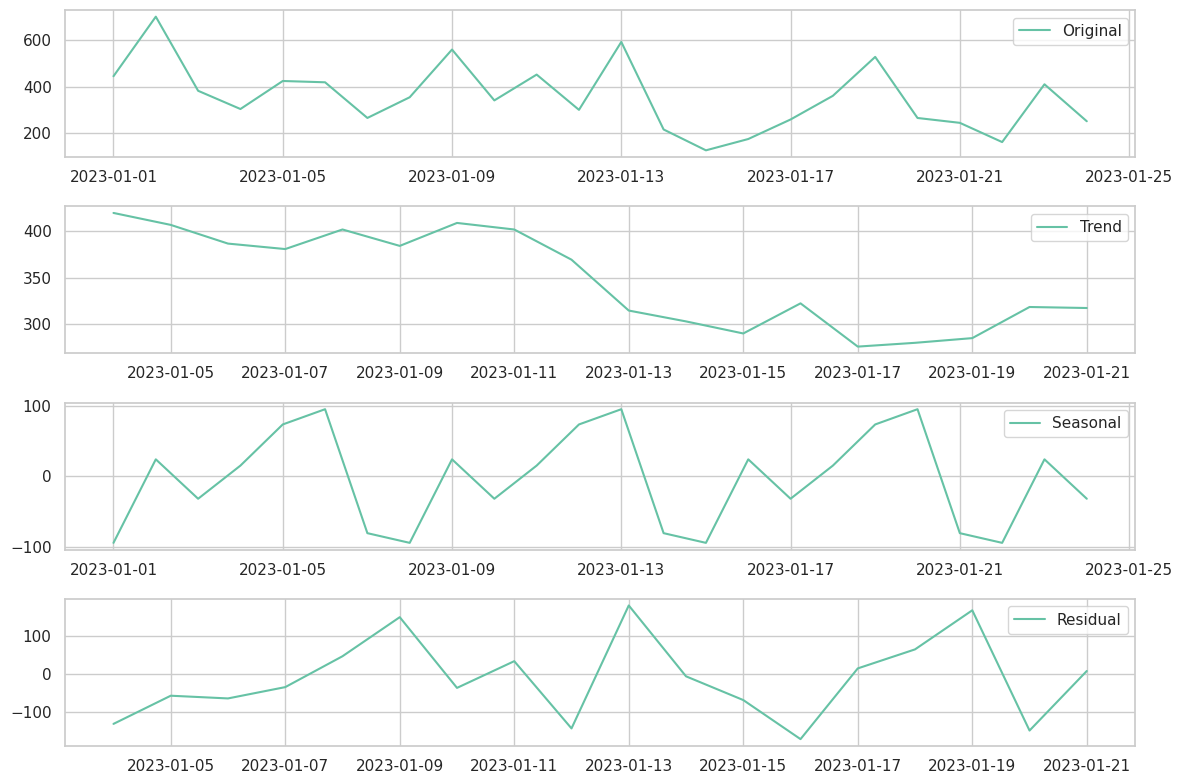

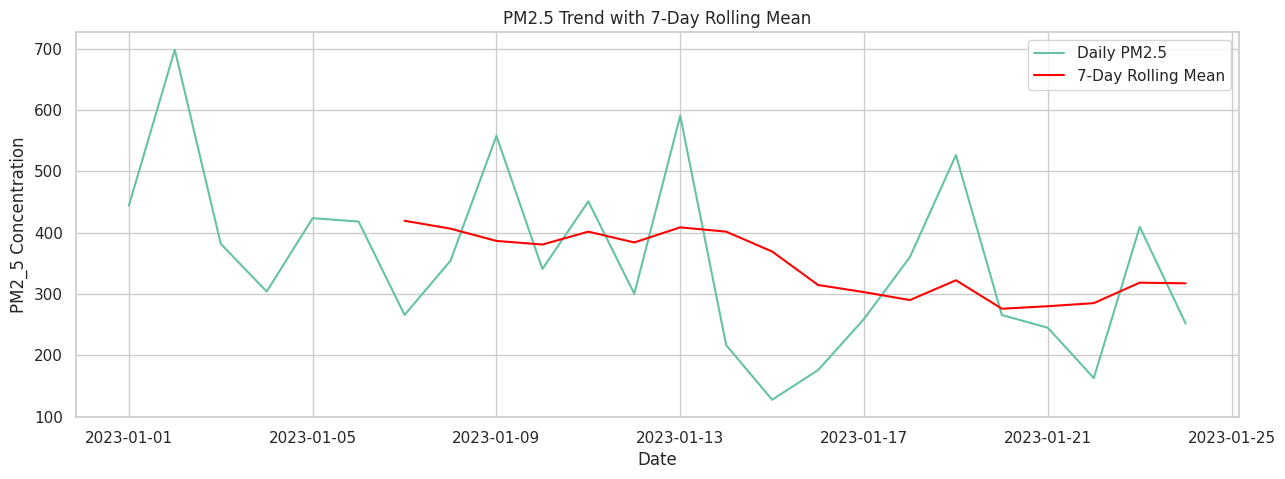

In [ ]:
decomposition = seasonal_decompose(daily_data['pm2_5'], model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_data['pm2_5'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Apply a 7-day rolling mean to smooth out the data (adjust as needed)
rolling_mean = daily_data['pm2_5'].rolling(window=7).mean()

# Plot the original data and the rolling mean
plt.figure(figsize=(15, 5))
plt.plot(daily_data['pm2_5'], label='Daily PM2.5')
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('PM2.5 Trend with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('PM2_5 Concentration')
plt.legend()
plt.show()


In [ ]:
def apply_rolling_mean(data, window):
    rolling_mean = data.rolling(window=window).mean()
    return rolling_mean

def calculate_aqi(row):
    return calculate_aqi

def hourly_aqi_analysis(data):
    return hourly_aqi_analysis

def day_night_aqi_comparison(data):
    return day_night_aqi_comparison

def check_and_convert_date_column(data):
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])
        data.set_index('date', inplace=True)
    else:
        print("The 'date' column is not found in the dataset.")

def extract_hour_from_date(data):
    if 'date' in data.columns:
        data['hour'] = data['date'].dt.hour
    else:
        print("The 'date' column is not found in the dataset.")

def check_and_convert_date_column(data):
    return check_and_convert_date_column

def extract_hour_from_date(data):
    return extract_hour_from_date

def calculate_hourly_aqi_and_plot(data):
       return calculate_hourly_aqi_and_plot

def calculate_average_aqi_day_night(data):
      return calculate_average_aqi_day_night

def day_vs_night_aqi_comparison(data):
      return day_vs_night_aqi_comparison

In [ ]:
def stl_decomposition(data):
    decomposition = seasonal_decompose(data, model='additive', period=7)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

In [ ]:
stl_decomposition(data['pm2_5'])

data['rolling_mean_pm25'] = apply_rolling_mean(data['pm2_5'], window=7)



hourly_aqi_analysis(data)
day_night_aqi_comparison(data)
check_and_convert_date_column(data)
extract_hour_from_date(data)
calculate_hourly_aqi_and_plot(data)
calculate_average_aqi_day_night(data)
day_vs_night_aqi_comparison(data)

<function __main__.day_vs_night_aqi_comparison(data)>

**Conclusion:**

The comprehensive analysis of air quality in Delhi highlights several critical insights and actionable strategies to address the city's persistent air quality challenges. The data reveals a concerning trend, where "Very Poor" and "Severe" air quality levels dominate, accounting for 98%(approx)of the observations, while "Good" and "Satisfactory" air quality levels are observed only 3% of the time. This indicates a dire need for immediate and sustained intervention.

This pattern suggests that night-time emissions, perhaps from residential heating or specific industrial activities, significantly impact overall air quality. The strong correlations observed among certain pollutants further suggest common sources or similar dispersion patterns, underscoring the need for targeted interventions to address these specific pollutants collectively.

To specifically mitigate carbon monoxide (CO) levels, a multifaceted strategy is recommended. Key measures include:

**Enforcing stringent vehicle emission standards:** Implementing stricter regulations on vehicle emissions can significantly reduce CO levels. This involves regular monitoring and maintenance of vehicles to ensure compliance with emission norms.

**Promoting cleaner fuels:** Encouraging the use of cleaner fuels, such as Compressed Natural Gas (CNG) and electric vehicles, can drastically reduce CO emissions from transportation.

**Optimizing traffic management:** Improving traffic flow and reducing congestion and idling through better traffic management systems can lower CO emissions. This includes implementing intelligent traffic management systems and promoting carpooling and public transportation.

**Imposing strict emissions regulations for industries:** Regulating industrial emissions by enforcing strict compliance with environmental standards can reduce CO and other pollutants.

**Integrating urban planning initiatives:** Prioritizing mixed land use and green infrastructure in urban planning can help disperse pollutants more effectively and reduce their concentration in any one area.

For overall air quality improvement, broader strategies include:

**Promoting renewable energy sources:** Encouraging the use of solar, wind, and other renewable energy sources can reduce reliance on fossil fuels, thereby decreasing air pollution.

**Adopting green building standards:** Implementing green building practices can reduce the environmental impact of construction and building operations, contributing to better air quality.

**Enhancing waste management practices:** Improving waste management systems to reduce open burning of waste and promoting recycling and proper disposal can significantly cut down on emissions.

**Expanding afforestation and urban greening initiatives:** Increasing green cover through afforestation and urban greening projects can help absorb pollutants and improve air quality.

**Fostering public awareness and education:** Educating the public about the sources and effects of air pollution and encouraging behavioral changes can lead to community-driven initiatives for air quality improvement.

**Fostering cross-sector collaboration:** Encouraging collaboration between government, industry, and civil society to develop and implement comprehensive air quality management plans ensures that efforts are well-coordinated and more effective.

By adopting a holistic approach and implementing these strategies collaboratively, Delhi can make significant strides in improving its air quality. This will not only safeguard public health but also create a more sustainable and livable environment for current and future generations. With persistent effort and strategic planning, it is possible to transform Delhi's air quality from its current state to a much healthier and more sustainable level.